各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理 注对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
fund = pd.read_csv("../nyse/fundamentals.csv")
secu = pd.read_csv("../nyse/securities.csv")

In [3]:
fund.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
secu.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

Counter({'Financials': 20, 'Industrials': 18, 'Information Technology': 14, 'Health Care': 13, 'Consumer Discretionary': 10, 'Consumer Staples': 8, 'Utilities': 5, 'Energy': 5, 'Materials': 3, 'Telecommunications Services': 3, 'Real Estate': 1})


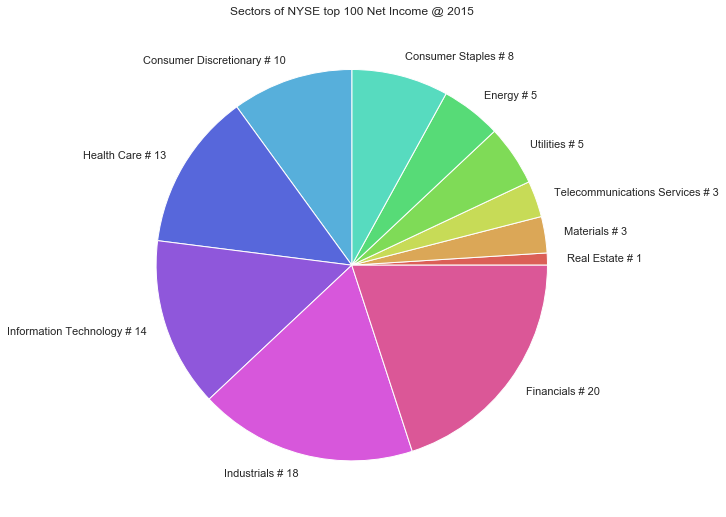

In [9]:
df1 = fund[["Ticker Symbol", "Net Income", "Period Ending"]]
df1 = df1[df1["Period Ending"] > "2015"]
df1 = df1[df1["Period Ending"] < "2016"]
df2 = secu[["Ticker symbol", "GICS Sector"]]

df = pd.merge(df1, df2, left_on="Ticker Symbol", right_on="Ticker symbol")
sdf = df.sort_values("Net Income")[-100:]["GICS Sector"]

from collections import Counter
sector_counter = Counter(sdf.values.tolist())
print(sector_counter)

cnts = []
secs = []
for s, c in sorted(sector_counter.items(),key=lambda x: x[1]):
    cnts.append(c)
    secs.append(s + " # {}".format(c))

_, ax = plt.subplots(figsize=(16, 9))


ax.set_prop_cycle(color=sns.hls_palette(11))


plt.pie(cnts, labels=secs)
plt.title("Sectors of NYSE top 100 Net Income @ 2015")
plt.show()

## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

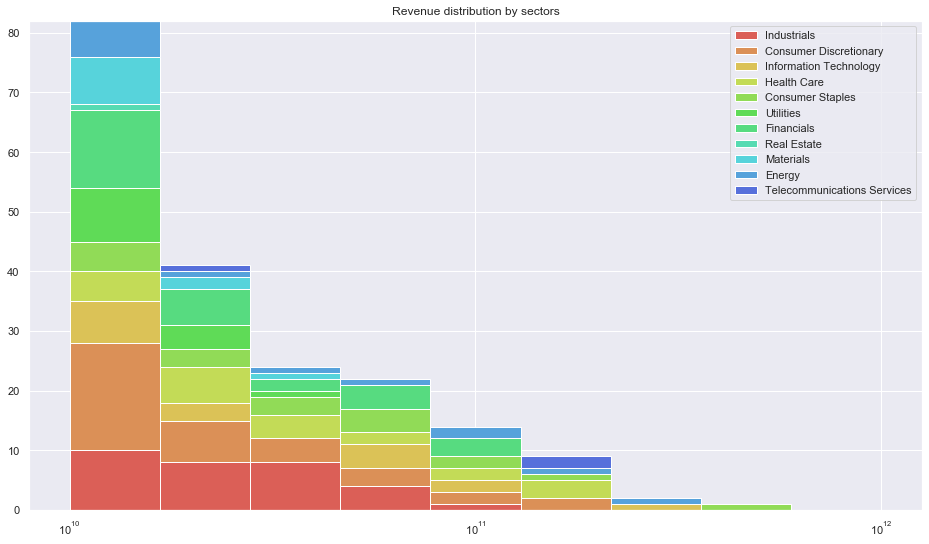

In [124]:
df1 = fund[["Ticker Symbol", "Total Revenue", "Period Ending"]]
df1 = df1[df1["Period Ending"] > "2015"]
df1 = df1[df1["Period Ending"] < "2016"]
df2 = secu[["Ticker symbol", "GICS Sector"]]

df = pd.merge(df1, df2, left_on="Ticker Symbol", right_on="Ticker symbol")
sector_name = df['GICS Sector'].unique()

fig, ax = plt.subplots(figsize=(16, 9))
ax.set_prop_cycle(color=sns.hls_palette(16))

plt.gca().set_xscale("log")
plt.hist([df[df['GICS Sector'] == sn]['Total Revenue'] for sn in sector_name], bins=np.logspace(np.log10(1e10),np.log10(1e12), 10), density=False, stacked=True)
plt.title("Revenue distribution by sectors")
plt.legend(sector_name)
plt.show()

## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

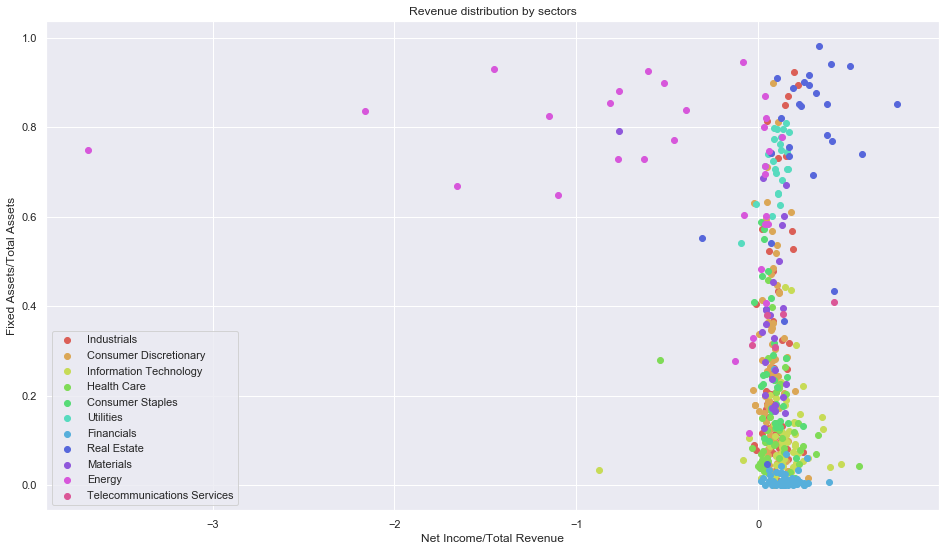

In [126]:
X1 = 'Net Income'
X2 = 'Total Revenue'

Y1 = 'Fixed Assets'
Y2 = 'Total Assets'

df1 = fund[["Ticker Symbol", X1, X2, Y1, Y2, "Period Ending"]]
df1 = df1[df1["Period Ending"] > "2015"]
df1 = df1[df1["Period Ending"] < "2016"]
df2 = secu[["Ticker symbol", "GICS Sector"]]

df = pd.merge(df1, df2, left_on="Ticker Symbol", right_on="Ticker symbol")
sector_name = df['GICS Sector'].unique()

fig, ax = plt.subplots(figsize=(16, 9))
ax.set_prop_cycle(color=sns.hls_palette(11))

for sn in sector_name:
    ax.scatter(df[df['GICS Sector'] == sn][X1] / df[df['GICS Sector'] == sn][X2], 
               df[df['GICS Sector'] == sn][Y1] / df[df['GICS Sector'] == sn][Y2])
plt.title("Revenue distribution by sectors")
plt.legend(sector_name)
plt.xlabel("{}/{}".format(X1, X2))
plt.ylabel("{}/{}".format(Y1, Y2))
plt.show()